In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
data = pd.read_csv("encoded_car_data.csv")
print(data.head())

   diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0

In [4]:
# Data preprocessing
#data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [6]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define the models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}
# Dictionary to store results
results = {}

In [10]:
# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with polynomial features and the model
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results[name] = {'MSE': mse, 'R2 Score': r2}

In [11]:
# Print results
print('=' * 50)
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.2f}, R² Score: {metrics['R2 Score']:.2f}")
print('=' * 50)

Ridge - Mean Squared Error: 0.26, R² Score: 0.79
Lasso - Mean Squared Error: 0.94, R² Score: 0.25
ElasticNet - Mean Squared Error: 0.63, R² Score: 0.49


In [12]:
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

In [13]:
# Set the figure size and create subplots
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

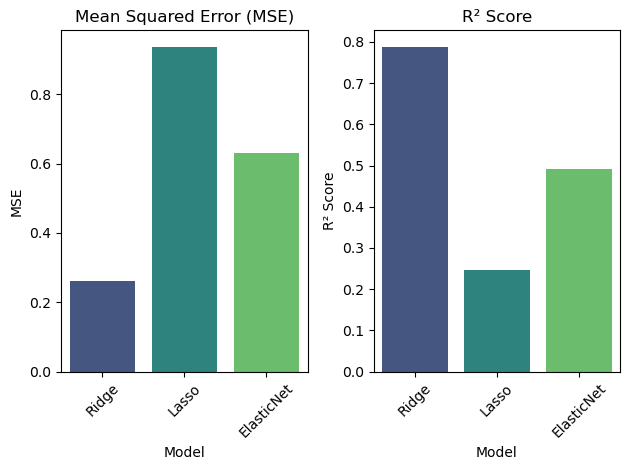

In [16]:
# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")
plt.xticks(rotation=45)

# Bar plot for R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="viridis")
plt.title("R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show() 